# Using Neural Networks to check how much accurate is the used Module

# Libraries

In [1]:
import pandas as pd
import io
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('whole_tweets.csv')
df=df.drop(labels=['Unnamed: 0'],axis=1)
df.head(5)

,Tweets,Sentiment
0,Insulted Indian Freedom Fighters- Shame on,0
1,SPECIAL BUT SHORT TIPS FOR SELF IMPROVEMENT :-...,1
2,entire bollywood industry put together cant eq...,1
3,Insulted Indian Freedom Fighters- Shame on,0
4,SPECIAL BUT SHORT TIPS FOR SELF IMPROVEMENT :-...,1


In [3]:
import re


def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', str(text))     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', str(text))  # removing @mentions
  text = re.sub(r'@[A-Za-z]+', '', str(text))        # removing @mentions
  text = re.sub(r'@[-)]+', '', str(text))            # removing @mentions
  text = re.sub(r'#', '', str(text))                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', str(text))           # removing RT
  text = re.sub(r'https?\/\/\S+', '', str(text))     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', str(text))          # removing '&gt;'
  text = re.sub(r'[^a-zA-Z0-9\s]', ' ', str(text))          # removing '&gt;'
  text= text.split()
  text=' '.join(text)

  return text


In [36]:
df['Tweets'] = df['Tweets'].apply(text_cleaning)
df.head(10)


,Tweets,Sentiment
0,Insulted Indian Freedom Fighters Shame on,0
1,SPECIAL BUT SHOTIPS FOR SELF IMPROVEMENT GENIO...,1
2,entire bollywood industry put together cant eq...,1
3,Insulted Indian Freedom Fighters Shame on,0
4,SPECIAL BUT SHOTIPS FOR SELF IMPROVEMENT GENIO...,1
5,entire bollywood industry put together cant eq...,1
6,Stop spreading hate TIMESNOW people shame on y...,0
7,Shame on you,0
8,Slams out never work speak comment secret agai...,0
9,says in the beginning of the interview that sh...,1


In [37]:
df['Sentiment'].value_counts()

1    473
0    211
Name: Sentiment, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df['Tweets'].values, df['Sentiment'].values, test_size=0.10,random_state=101)


In [39]:
print('sentiment Text: ', x_train[0])
print('sentiment: ', y_train[0])


sentiment Text:  all Kangana Ranauat fans are very happy today
sentiment:  1


In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [41]:
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
# oov_token="<OOV>"
tokenizer.fit_on_texts(x_train)
#RaggedTensor


In [42]:
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)


The size of datatset vocab is:  2810


In [43]:
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])


Training sequence:  [45, 23, 1197, 265, 18, 129, 772, 236]
Testing sequence:  [46, 69, 76, 31, 103, 581, 69, 76, 31, 4, 25, 2426, 1022, 907, 205, 360]


In [44]:
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)


The length of training sequence is:  51


In [45]:
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])


The length of testing sequence is:  51


In [46]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model,Sequential
vec_features = 40
# i = Input(shape=(T, ))
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        V+1,vec_features , input_length=T),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=50)


Epoch 1/50
20/20 [==============================] - 1s 9ms/step - loss: 0.6646 - accuracy: 0.6748 - val_loss: 0.6594 - val_accuracy: 0.6377
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.6976 - val_loss: 0.6764 - val_accuracy: 0.6377
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.6976 - val_loss: 0.6774 - val_accuracy: 0.6377
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5831 - accuracy: 0.6976 - val_loss: 0.6754 - val_accuracy: 0.6377
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5660 - accuracy: 0.6976 - val_loss: 0.6614 - val_accuracy: 0.6377
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.7220 - val_loss: 0.6466 - val_accuracy: 0.6377
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.7691 - val_loss: 0.6086 - val_accuracy: 0.6522
Epoch 8/50
20/20 [==

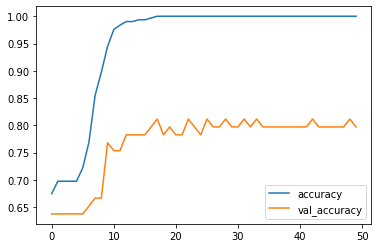

In [47]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()


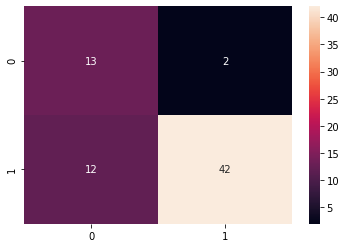

In [48]:

from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
y_pred=model.predict(pad_test)
mat=confusion_matrix(y_pred.round(),y_test)
f = sns.heatmap(mat, annot=True, fmt='d')



In [49]:
accuracy_score(y_pred.round(),y_test)

0.7971014492753623

In [50]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(V+1, 64),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
model2.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
r = model2.fit(pad_train, y_train, validation_data=(
    pad_test, y_test), epochs=5)


Epoch 1/5
20/20 [==============================] - 12s 191ms/step - loss: 0.6321 - accuracy: 0.6959 - val_loss: 0.6575 - val_accuracy: 0.6377
Epoch 2/5
20/20 [==============================] - 2s 106ms/step - loss: 0.6024 - accuracy: 0.6976 - val_loss: 0.6617 - val_accuracy: 0.6377
Epoch 3/5
20/20 [==============================] - 2s 107ms/step - loss: 0.3795 - accuracy: 0.8520 - val_loss: 0.5499 - val_accuracy: 0.7246
Epoch 4/5
20/20 [==============================] - 2s 107ms/step - loss: 0.1285 - accuracy: 0.9626 - val_loss: 0.6173 - val_accuracy: 0.7391
Epoch 5/5
20/20 [==============================] - 2s 108ms/step - loss: 0.0243 - accuracy: 0.9951 - val_loss: 1.2538 - val_accuracy: 0.7681


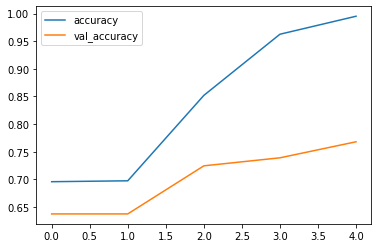

In [51]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()


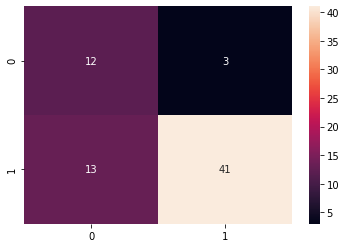

In [52]:

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = model2.predict(pad_test)
mat = confusion_matrix(y_pred.round(), y_test)
f = sns.heatmap(mat, annot=True, fmt='d')


In [54]:
accuracy_score(y_pred.round(), y_test)


0.7681159420289855

# **SVM**

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
documents = ["This is Import Data's Youtube channel",
             "Data science is my passion and it is fun!",
             "Please subscribe to my channel"]
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(documents)
pd.DataFrame(document_term_matrix.toarray(),
             columns=vectorizer.get_feature_names())


,and,channel,data,fun,import,is,it,my,passion,please,science,subscribe,this,to,youtube
0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1
1,1,0,1,1,0,2,1,1,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [59]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, stop_words='english')
vectorizer.fit(list(x_train) + list(x_test))
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [57]:
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True)
prob = svm.fit(x_train_vec, y_train)
y_pred_svm = svm.predict(x_test_vec)


In [58]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ",
      accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  78.26086956521739 %
